In [ ]:
# verilerin görselleştirilmesi ve kaydedilmesi için bilgi toplama
from matplotlib import pyplot as plt
import numpy as np  # sayısal hesaplamalar için
import pandas as pd  # tablodaki verileri yönetmek için (tablo formatındaki verilerle çalışmak için)

# csv dosyasındaki verilerin kaydedilmesi
data = pd.read_csv("/content/drive/MyDrive/archive/hmnist_28_28_RGB.csv")

# 5 veriyi getirir
data.head()

# görüntü veri kümeleriyle ilgili meta verileri okuma (etiketler ve hasta bilgileri)
meta_df = pd.read_csv("/content/drive/MyDrive/archive/HAM10000_metadata.csv")

# meta verinin ilk 5 satırı görüntüleme
meta_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
!pip install --upgrade tensorflow jax jaxlib
#Bu komut, Python paket yöneticisi pip ile TensorFlow, JAX, ve JAXlib kütüphanelerini güncellemeyi amaçlar.
#Tensorflow büyük veri kümeleri üzerinde çalışırken etkili ve gpu desteği sağlar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does no

In [ ]:
meta_df.shape

data.shape

(10015, 2353)

In [ ]:
# Veri ve etiketleri ayırma
yData = data['label'] #etiket sütununu seçer
XData = data.drop(columns=['label'])

# Hedef sınıflar
target_classes = [4, 6, 2]  # nv, mel, bkl sınıflarının etiketleri

# Sadece hedef sınıfları seçiyoruz
filtered_indices = yData.isin(target_classes)

# Filtrelenmiş veriler
XData = XData[filtered_indices]
yData = yData[filtered_indices]

# Etiketleri yeniden kodlama (4 -> 0, 6 -> 1, 2 -> 2)
class_mapping = {4: 0, 6: 1, 2: 2}
yData = yData.map(class_mapping)

 Model, XData'yı giriş olarak alır ve bu girişlerden yData'yı tahmin etmeye çalışır.

 XData => Modelin öğrenmesi için kullandığı özellikler veya girdi verileri.

 yData => Modelin tahmin etmeye çalıştığı etiketler

XData:

Modelin öğrenme yaparken kullandığı girdi verileri.
Şekil olarak genelde bir matristir: (örnek sayısı, özellik sayısı).

yData:

Modelin tahmin etmeye çalıştığı çıktı verileri (etiketler).
Şekil olarak genelde bir vektördür: (örnek sayısı,).

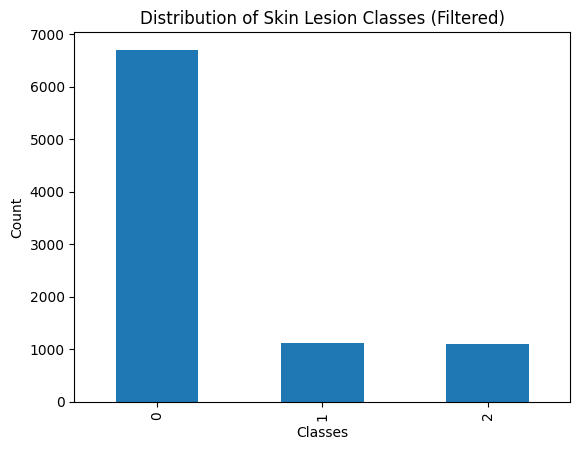

In [ ]:
# Grafik: Yeni sınıf dağılımını görselleştirme
dist = yData.value_counts()
dist.plot(kind='bar')

plt.title('Distribution of Skin Lesion Classes (Filtered)')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [ ]:
dist = yData.value_counts()
dist

,count
label,
0,6705
1,1113
2,1099


In [ ]:
# veri dengesizliğini düzeltme
from imblearn.over_sampling import RandomOverSampler # daha az örneğe sahip olan sınıfın örnek sayısını artırır
sampler = RandomOverSampler() #RandomOverSampler sınıfının nesnesi. Bu nesne veri setini dengelemek için kullanılacak
XData,yData  = sampler.fit_resample(XData,yData) #fit_resample yöntemi, XData ve yData veri setlerindeki sınıf dengesizliğini giderir. fit_resample ile her sınıftaki örnek sayısı eşit hale getirilir.
XData.shape, yData.shape
XData = np.array(XData).reshape((-1, 28, 28, 3)) #Bu adımda, XData, her bir örneği 28x28 boyutunda ve RGB renkli olacak şekilde yeniden şekillendiriliyor.
#Burada -1 ifadesi, otomatik olarak örnek sayısını belirtir.
# Şekil (20115, 28, 28, 3) olur. Bu, 20.115 örneğin her birinin 28x28 piksel boyutunda ve 3 kanallı (RGB) olduğunu belirtir.
XData = XData / 255
#Bu işlem, her piksel değerini 0 ile 1 arasında olacak şekilde yeniden ölçeklendirir. Her bir piksel değeri 0-255 arasında olduğu için 255'e bölünür.
XData.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


(20115, 28, 28, 3)

fit_resample: Sınıf dengesi sağlanana kadar azınlık sınıflardan rastgele örnekler alır ve bu örnekleri veri setine ekler.

reshape: Verileri model için uygun bir formatta düzenler. (görsellerin her biri 28x28 piksel boyutu ve rgb renkli)



Görsel verilerdeki piksel değerleri genellikle 0 ile 255 arasında olur.

0: Siyah

255: Beyaz

Bu işlem, her piksel değerini 255'e bölerek 0 ile 1 arasında ölçeklendirir.

Örneğin:
Piksel değeri 0 ise →
0
/
255
=
0.0
0/255=0.0
Piksel değeri 128 ise →
128
/
255
≈
0.502
128/255≈0.502
Piksel değeri 255 ise →
255
/
255
=
1.0
255/255=1.0

Derin öğrenme modelleri (özellikle sinir ağları), giriş verileri küçük ölçeklerde olduğunda daha iyi performans gösterir. görsel verileri derin öğrenme modellerine uygun hale getiren önemli bir ön işleme adımıdır.

In [ ]:
# veri setini eğitim ve test veri kümelerine ayırmak için train_test_split fonks. kullanır
from sklearn.model_selection import train_test_split

# XData ve yData'yı eğitim verilerine (Xtrain, Ytrain) ve test verilerine (Xtest, Ytest) ayırın
# test_size=0,1, verilerin %10'unun test için ve %90'ının eğitim için kullanılacağı anlamına gelir
Xtrain, Xtest, Ytrain, Ytest = train_test_split(XData, yData, test_size=0.1)

Xtrain.shape, Xtest.shape # eğitim ve test kümelerinin boyutunu yazdırır.

((18103, 28, 28, 3), (2012, 28, 28, 3))

yData: sınıf etiketleri


Xtrain: Eğitim için kullanılacak girdi verileri.

Xtest: Test için kullanılacak girdi verileri.

Ytrain: Eğitim için kullanılacak etiketler.

Ytest: Test için kullanılacak etiketler.

In [ ]:
!pip install tensorflow jax jaxlib
# TensorFlow: Derin öğrenme modeli oluşturmak eğitmek ve değerlendirmek için framework.
# jax: otomatik türev özelliği olan kütüphane
# jaxlib: jax kütüphanesi için gpu/tpu hızlandırması sağlayan yardımcı kütüphane

In [ ]:
#TensorFlow ve Keras kullanılarak bir görüntü sınıflandırma modeli oluşturmak için gerekli ayarları ve katmanları hazırlar.
import tensorflow as tf #tensorflow'un tüm fonksiyonlarına tf kısaltmasıyla erişilebilir.
from tensorflow.keras.models import Model #keras'dan Model sınıfını içeri aktarır. Model sınıfı Keras'da katmanları birbirine bağlayarak bir sinir ağı modeli oluşturmak için kullanılır.
from tensorflow.keras import layers, models #keras katmanları ve modelleri içe aktarma (layers: katmanlar models: model tanımlama ve oluşturma işlevlerini içerir)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.layers import Conv2DTranspose, ZeroPadding2D, SpatialDropout2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

# input_shape, modele verilecek giriş görüntülerinin boyutunu belirtir. Burada (28, 28, 3) ifadesi, 28x28 piksel boyutunda ve 3 kanal (RGB) olan görüntüler için ayarlanmıştır.
input_shape = (28, 28, 3)

# modelin tahmin edeceği sınıf sayısını belirtir
num_classes = 3

    Convolution Katmanları (evrişimsel katmanlar)
Bu katmanlar, görüntü verilerinden özellik çıkarımı yapmak için kullanılır. Filtreler(kernels) sayesinde görüntüdeki özellikler (kenarlar, dokulari renk geçişleri) tespit edilir.

Conv2D: 2D Convolution katmanı
--
- Görsellerdeki kenarları ve özellikleri öğrenmek için kullanılır. (lezyonların şekli dokusu gibi özellikleri bu katmanda tespit edilir.)
- Parametreler: Filtre sayısı, filtre boyutu, aktivasyon fonksiyonu.

SeparableConv2D:
--
- Standart Convolution'a göre daha hızlıdır.
- Hesaplama maliyetini azaltırken, model performansını korur.

Conv2DTranspose:
--
- Görüntünün boyutunu artırır. Segmentasyon modellerinde kullanır. (segmentasyon: bir görüntüyü piksel gruplarına ayırma işlemi)
- Cilt kanseri görüntülerine segmentasyon yaparken kullandığım katman


    Havuzlama Katmanları
Bu katmanlari evrişim katmanlarından çıkan özellik haritalarının boyutlarını küçültmek ve önemli özellikleri korumak için kullanılır.

MaxPooling2D:
--
- Görüntünün boyutunu küçültür.
- Her bölgedeki en yüksek piksel değerini alır. Bu işlem, önemli özellikleri korur ve önemsiz detayları atar. Böylece modelin gereksiz detaylarla aşırı uyum sağlamasını önler.
- Önemli Özellikleri Korur. (Görseldeki kenar, desen veya doku gibi belirgin özellikleri tutar.)


AveragePooling2D:
--
- Maxpooling'e benzer şekilde görüntünün boyutunu küçültür, ancak bu sefer her bölgenin ortalama değerini seçer.
- Bazı durumlarda özelliklerin ortalama değerlerini korumak daha iyi sonuç verebilir.

GlobalAveragePooling2D:
--
- Her özellik haritasının ortalamasını alır ve vektör haline getirir. (özellik haritaları lezyonların kenarlarını, renklerini, dokularını ve diğer ayırt edici özelliklerini yakalar.)
- Amaç: Her özellik haritasının genel ortalamasını alarak, tam bağlantılı(dense) katmanlarına geçmeden önce boyut küçültme yapar. Bu sınıflandırma problemlerinde kullanılır.


    Normalizasyon ve Regularizasyon Katmanları
Bu katmanlar modelin overfitting (aşırı uyum) sorununu önlemek ve eğitim sürecini stabilize etmek için kullanılır.

BatchNormalization:
--
- Her batch (toplu işlem) için girdileri normalize eder.
- Veri setinde farklı görüntüler arasındaki ölçek farklılıklarını dengelemek için kullanılır.

Dropout:
--
- Eğitim sırasında rastgele nöronları (nöron: yapay sinir ağlarının en küçük yapı taşıdır) devre dışı bırakır. Overfitting'i önlemek için kullanılır.
- Veri setim sınırlı boyutta olduğu için modelin eğitim verilerine overfitting olmasını engellemek için kullandım


SpatialDropout2D:
--
- Tüm bir özellik haritasını rastgele devre dışı bırakır. Yani, bir özellik haritasındaki tüm pikseller sıfırlanır.
- Evrişimsel katmanlarda overfitting'i engellemek için kullanılır. Modelin belirli özelliklere aşırı bağımlı olmasını engeller.


    Aktivasyon Katmanları

Activation:
--
- Evrişim veya tam bağlantılı katmanların çıktısına aktivasyon fonksiyonu uygular. (örnek ReLU, sigmoid, softmax gibi fonks)
- Modelin doğrusal olmayan özellikler öğrenmesini sağlar. Örneğin ReLU fonksiyonu negatif değerleri sıfırlar ve pozitif değerleri korur. Bu da modelin daha hızlı öğrenmesini sağlar.  
-(Doğrusal Modellerin Sınırlılığı: Eğer bir model sadece doğrusal ilişkiler öğrenebilseydi, karmaşık problemleri (örneğin, görüntü sınıflandırma) çözemezdi. Karmaşık Özellikler: Gerçek dünya problemleri genellikle doğrusal değildir. Örneğin, bir görüntüdeki nesnelerin şekli, rengi ve dokusu gibi özellikler doğrusal olmayan ilişkiler içerir.)


    Diğer Yardımı Katmanlar

ZeroPadding2D:
--
- Görüntünün etrafına sıfırlardan oluşan bir kenar ekler.
- Evrişim işlemleri sırasında görüntünün boyutunun küçülmesini engellemek için kullanılır.


    Tam Bağlantılı (Dense) Katmanlar

Dense:
--
- Evrişim katmanlarından çıkan özellik haritalarını birleştirir ve sınıflandırma işlemi yapar.
- Modelin sonunda cilt kanseri türlerini sınıflandırmak için kullandım.

TensorFlow: derin öğrenme modelleri oluşturmak, eğitmek ve değerlendirmek için kullanılan bir kütüphanedir.

Keras: TensorFlow’un üzerine kurulmuş ve işleri daha kolay hale getiren bir araçtır. Daha az kod yazmanızı sağlar.



In [ ]:
# Xtrain, başlangıçta 28x28 piksel boyutundayken, tf.image.resize fonksiyonuyla 128x128 piksel boyutuna çıkarılır.
#Yeni boyutlandırılmış görüntüler Xtrain_resized değişkeninde saklanır. Bu, modelin daha büyük boyutlardaki özellikleri öğrenebilmesi için görüntülerin çözünürlüğünü artırır.
Xtrain_resized = tf.image.resize(Xtrain, (128, 128))

# Bu satır, Xtest (test verileri) veri kümesindeki görüntüleri aynı şekilde 128x128 piksel boyutuna ölçeklendirir.
Xtest_resized = tf.image.resize(Xtest, (128, 128))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten #flatten çok boyutlu tensörü tek boyutlu tensöre dönüştürür. evrişim katmanından sonra tam bağlı katmanlara geçiş için kullanılır. Dense de her bir giriş her bir çıkışa bağlıdır.
from tensorflow.keras.models import Model #kerasta modeloluşturmak için kullanılan sınıf
#tensör: çok boyutlu dizi veya matrisler

# Eğitim sırasında görüntüleri döndürme, kaydırma, ölçekleme gibi işlemlerle modeli daha sağlam ve dayanıklı hale getirildi
datagen = ImageDataGenerator(
    rotation_range=20,         # 20 derece aralığında rastgele görüntü döndürme
    width_shift_range=0.2,     # Görüntüyü yatay olarak %20 kaydırma
    height_shift_range=0.2,    # Görüntüyü dikey olarak %20 kaydırma
    zoom_range=0.2,            # Resmi %20 oranında rastgele büyütün veya küçültün
    horizontal_flip=True,      # Görüntüyü yatay olarak çevirir
    fill_mode='nearest'        # Eksik pikselleri en yakın yöntemle doldurun
)
# Eğitim verilerinde veri artırma gerçekleştirin (Xtrain_resize)
train_datagen = datagen.flow(Xtrain_resized, Ytrain, batch_size=32) #batch_size=32, her adımda modele verilecek 32 görüntü oluşturur.

# ImageNet'te önceden eğitilmiş ağırlıklarla bir MobileNetV2 modeli yüklenedi
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet') #ImageNet veri setinde önceden eğitilmiş MobileNetV2 modelini yükler.
base_model.trainable = False #önceden eğitilmiş modelin ağırlıklarını dondurur. eğitim sırasında güncellenmez

# MobileNetV2'yi temel alarak yeni bir model oluşturun ve sınıflandırma için bir çıktı katmanı ekleyin
model = tf.keras.Sequential([
    base_model,
    Flatten(), #Evrişimli katmanların çıktısını tek boyutlu bir vektöre düzleştirir.
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax') #çıkış fonksiyonu. her bir sınıf için olasılık skorları üretir. softmax aktivasyon fonksiyonu bu skorları olasılık dağılımına dönüştürür.
])

# Model derlemesini gerçekleştirin
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Veri artırmaya sahip eğitim modelleri
history = model.fit(train_datagen, epochs=30, validation_data=(Xtest_resized, Ytest)) #30 kez eğitilcek

# Model değerlendirmesi
test_loss, test_acc = model.evaluate(Xtest_resized, Ytest)
print(f'Test accuracy: {test_acc}')

include_top=False: Orijinal modelin sınıflandırma katmanlarını (son katmanlarını) dahil etmez. Bu, modelin yalnızca özellik çıkarıcı olarak kullanılacağı anlamına gelir.
base_model.trainable = False: Modelin önceden eğitilmiş ağırlıkları dondurulur, böylece eğitim sırasında güncellenmez.


Amaç: MobileNetV2'nin üzerine yeni sınıflandırma katmanları eklemek.
Katmanlar:
Flatten(): 4 boyutlu çıktı, tam bağlantılı katmanlara uygun bir vektöre dönüştürülür.
Dense(128, activation='relu'): 128 nöronlu bir tam bağlantılı katman, ReLU aktivasyonu ile.
Dense(num_classes, activation='softmax'): Sınıf sayısına (örneğin, 3) göre çıktı üreten son katman.


In [ ]:
model.save("mobil_last2.h5")

from google.colab import files
files.download("mobil_last2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Tahmin değerlerini elde etme
y_pred = np.argmax(model.predict(Xtest_resized), axis=1)

# Genel metrikleri hesaplama
precision = precision_score(Ytest, y_pred, average='weighted')
recall = recall_score(Ytest, y_pred, average='weighted')
f1 = f1_score(Ytest, y_pred, average='weighted')
accuracy = accuracy_score(Ytest, y_pred)

# Metrikleri DataFrame olarak düzenleme
metrics_df = pd.DataFrame({
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
    'Accuracy': [accuracy]
})

# Sonuçları gösterme
print(metrics_df)


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step
   Precision    Recall  F1-Score  Accuracy
0   0.782671  0.761928  0.760361  0.761928


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


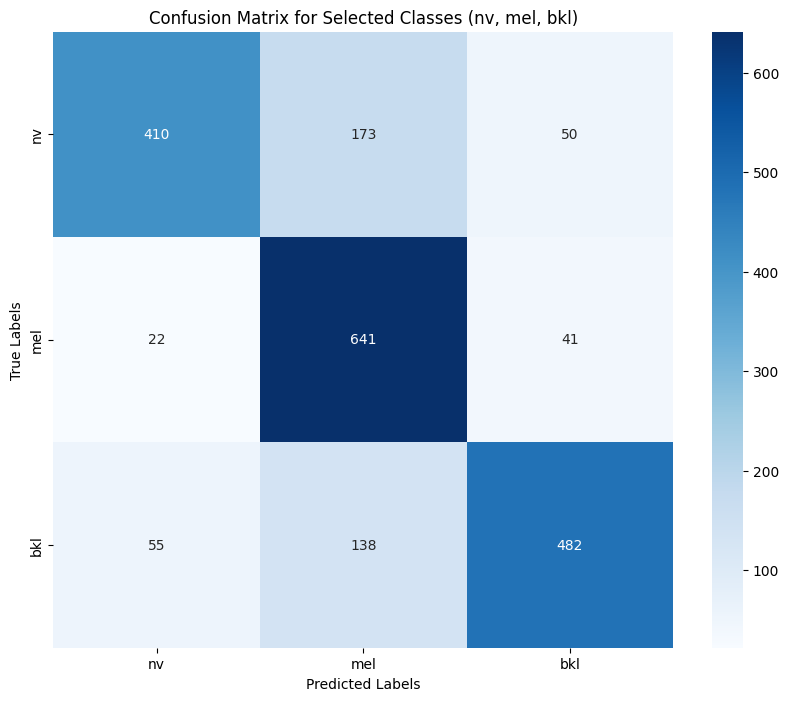

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Model ile test verilerini tahmin etme
y_pred = np.argmax(model.predict(Xtest_resized), axis=1)

# Karşıtlık matrisini oluşturma
cm = confusion_matrix(Ytest, y_pred)

# Sınıf isimlerini tanımlama (seçilen sınıflar)
class_names = ['nv', 'mel', 'bkl']  # Sadece üç sınıf

# Karşıtlık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Selected Classes (nv, mel, bkl)")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# eğitim verilerine veri artırma
train_datagen = datagen.flow(Xtrain_resized, Ytrain, batch_size=32)

# ImageNet'te önceden eğitilmiş ağırlıklarla bir MobileNetV2 modeli yükleme
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# MobileNetV2 ile yeni bir model oluşturun ve sınıflandırma için bir çıktı katmanı ekleme
model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Model derlemesini gerçekleştirme
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_datagen, epochs=20, validation_data=(Xtest_resized, Ytest))

# İnce ayar için MobileNetV2'nin son birkaç katmanını yeniden açma
base_model.trainable = True #Önceden eğitilmiş modelin ağırlıklarını çözülürl
fine_tune_at = 100 #İlk 100 katmanın ağırlıkları dondurulur, geri kalan katmanlar eğitilebilir hale getirilir.

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Modeli daha düşük bir öğrenme oranıyla yeniden derlemek
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), #düşük öğrenme oranı önceden eğitilmiş ağırlıkların çok değişmesini önler
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli ince ayar ile tekrar eğitme
history_fine = model.fit(train_datagen, epochs=20, validation_data=(Xtest_resized, Ytest))

# İnce ayardan sonra modeli değerlendirme
test_loss, test_acc = model.evaluate(Xtest_resized, Ytest)
print(f'Test accuracy after fine-tuning: {test_acc}')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


566/566 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.5857 - loss: 1.2061 - val_accuracy: 0.6486 - val_loss: 0.7366
Epoch 2/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 65s 113ms/step - accuracy: 0.6596 - loss: 0.7568 - val_accuracy: 0.6998 - val_loss: 0.6709
Epoch 3/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 65s 113ms/step - accuracy: 0.6748 - loss: 0.7342 - val_accuracy: 0.7083 - val_loss: 0.6408
Epoch 4/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 65s 113ms/step - accuracy: 0.6902 - loss: 0.7005 - val_accuracy: 0.7092 - val_loss: 0.6702
Epoch 5/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 65s 113ms/step - accuracy: 0.7002 - loss: 0.6813 - val_accuracy: 0.7376 - val_loss: 0.5980
Epoch 6/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 65s 113ms/step - accuracy: 0.7057 - loss: 0.6715 - val_accuracy: 0.7465 - val_loss: 0.5981
Epoch 7/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 65s 113ms/step - accuracy: 0.7093 - loss: 0.6511 - val_accuracy: 0.7475 - val_loss: 0.5927
Epoch 8/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 65s 113ms/step - accuracy: 0.7070 - loss: 0.6603 - val

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step


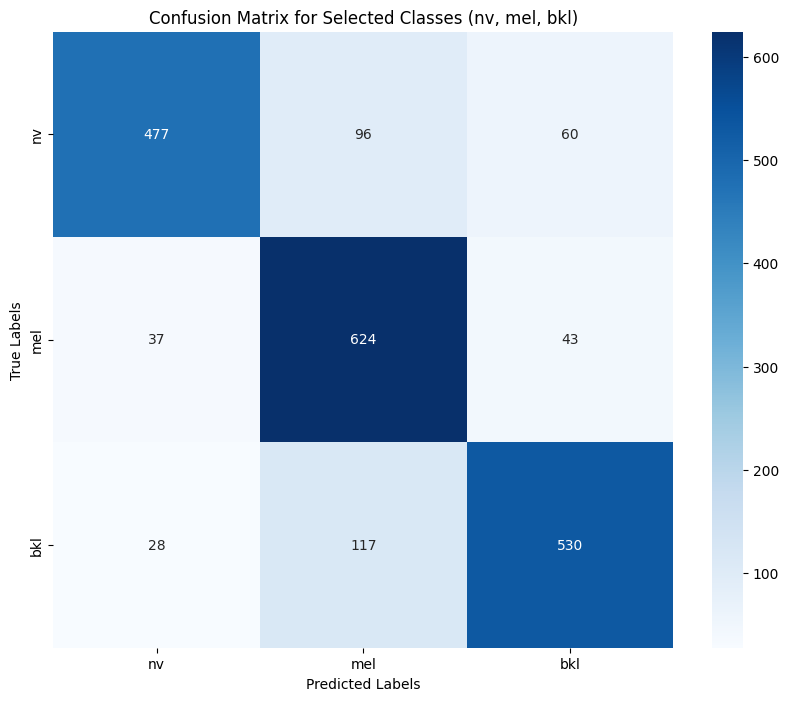

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Model ile test verilerini tahmin etme
y_pred = np.argmax(model.predict(Xtest_resized), axis=1)

# Karşıtlık matrisini oluşturma
cm = confusion_matrix(Ytest, y_pred)

# Sınıf isimlerini tanımlama (seçilen sınıflar)
class_names = ['nv', 'mel', 'bkl']  # Sadece üç sınıf

# Karşıtlık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Selected Classes (nv, mel, bkl)")
plt.show()


In [ ]:
model.save("Mobilenet_fine_last.h5")
from google.colab import files
files.download("Mobilenet_fine_last.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save("Mobilenet_fine_last.keras")
from google.colab import files
files.download("Mobilenet_fine_last.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Tahmin değerlerini elde etme
y_pred = np.argmax(model.predict(Xtest_resized), axis=1)

# Her bir sınıf ve genel performans için metrikleri içeren raporu oluşturma
report = classification_report(Ytest, y_pred, output_dict=True)

# Genel accuracy değerini ekleme
overall_accuracy = accuracy_score(Ytest, y_pred)
report['accuracy'] = {'precision': None, 'recall': None, 'f1-score': None, 'support': None, 'accuracy': overall_accuracy}

# DataFrame oluşturma
metrics_df = pd.DataFrame(report).transpose()

# Sonuçları gösterme
print(metrics_df)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score  support  accuracy
0              0.880074  0.753555  0.811915    633.0       NaN
1              0.745520  0.886364  0.809864    704.0       NaN
2              0.837283  0.785185  0.810398    675.0       NaN
accuracy            NaN       NaN       NaN      NaN  0.810636
macro avg      0.820959  0.808368  0.810725   2012.0       NaN
weighted avg   0.818637  0.810636  0.810688   2012.0       NaN


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Model ile test verilerini tahmin etme
y_pred = np.argmax(model.predict(Xtest_resized), axis=1)

# Accuracy hesaplama
accuracy = accuracy_score(Ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report ile recall, precision, F1-score gibi metrikleri hesaplama
report = classification_report(Ytest, y_pred, target_names=class_names)
print(report)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.81
              precision    recall  f1-score   support

          nv       0.88      0.75      0.81       633
         mel       0.75      0.89      0.81       704
         bkl       0.84      0.79      0.81       675

    accuracy                           0.81      2012
   macro avg       0.82      0.81      0.81      2012
weighted avg       0.82      0.81      0.81      2012



Precision(Doğruluk): Bir sınıfa ait olarak tahmin edilen örneklerin gerçekten o sınıfa ait olmasıdır.
- Modelin "mel" olarak tahmin ettiği örneklerin ne kadarı gerçekten "mel" olduğunu ölçer.
- mele mel de demiş nv de demiş kaçı mel

Recall(Duyarlılık): Bir sınıfa ait olan tüm örneklerin ne kadarının doğru tahmin edildiğini gösterir.
- Modelin gerçekte "mel" sınıfına ait olan örneklerin ne kadarının model tarafından doğru bir şekilde "mel" olarak tanımlandığını ölçer.
mel olan resimlerin hepsine mel demişmi

F1-Score: Keskinlik ve duyarlılığın harmonik ortalamasıdır.

support: her sınıfın gerçek örnek sayısını gösterir.

macro avg: tüm sınıflar için hesaplanan metriklerin ortalamasıdır.

weighted avg: her sınıfın örnek sayısına göre ortalamasıdır.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Tahmin değerlerini elde etme
y_pred = np.argmax(model.predict(Xtest_resized), axis=1)

# Genel metrikleri hesaplama
precision = precision_score(Ytest, y_pred, average='weighted')
recall = recall_score(Ytest, y_pred, average='weighted')
f1 = f1_score(Ytest, y_pred, average='weighted')
accuracy = accuracy_score(Ytest, y_pred)

# Metrikleri DataFrame olarak düzenleme
metrics_df = pd.DataFrame({
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
    'Accuracy': [accuracy]
})

# Sonuçları gösterme
print(metrics_df)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
   Precision    Recall  F1-Score  Accuracy
0   0.818637  0.810636  0.810688  0.810636


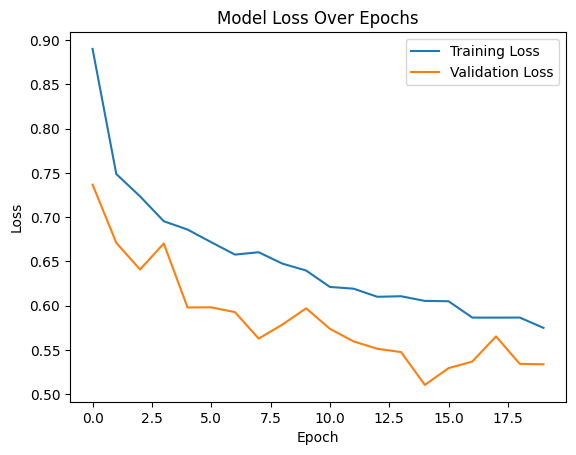

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıplarını çizdirme
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Grafiği etiketlendirme
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

# Grafiği gösterme
plt.show()


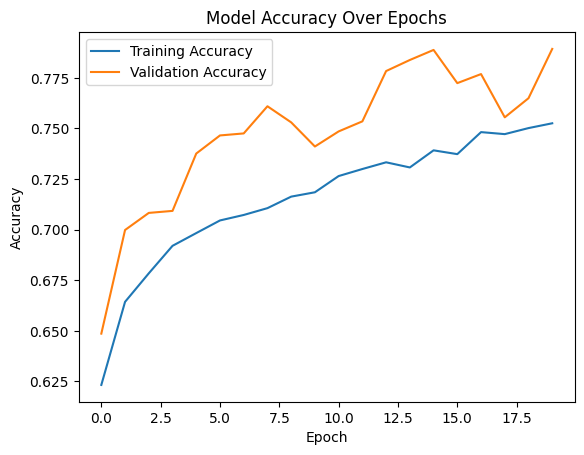

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğunu çizdirme
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Grafiği etiketlendirme
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

# Grafiği gösterme
plt.show()
